![](https://images.aicrowd.com/raw_images/challenges/banner_file/956/7e8d18912839dd712e9c.jpg)

<h2><center> Getting Started with Programming Language Classification</center></h2>

In this puzzle, we have to classify the programming language from code. For classifying programming language we will have code snippets from which we need to identify the programming language. As the code snippets are texts, at first we need to tokenize the code snippets. In this process, we will learn more about tokenization and classification algorithms. 

In this starter notebook:
> For tokenization: We will use **CountVectorizer** and **TfidfTransformer**.

> For Classification: We will use **Multinomial Naive Bayes Classifier**.




 AIcrowd code utilities for downloading data for Language Classification


# Download the files 💾¶
## Download AIcrowd CLI

We will first install aicrowd-cli which will help you download and later make submission directly via the notebook.


In [25]:
!pip install aicrowd-cli
%load_ext aicrowd.magic

In [2]:
!pip install autogluon


     |████████████████████████████████| 273 kB 5.3 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 352 kB 69.9 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |████████████████████████████████| 210 kB 79.3 MB/s 
     |████████████████████████████████| 4.2 MB 22.5 MB/s 
     |████████████████████████████████| 802 kB 78.1 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 27.4 MB 1.2 MB/s 
     |████████████████████████████████| 131 kB 78.5 MB/s 
     |████████████████████████████████| 119 kB 72.3 MB/s 
     |████████████████████████████████| 1.3 MB 67.0 MB/s 
     |████████████████████████████████| 3.0 MB 56.5 MB/s 
     |████████████████████████████████| 296 kB 76.8 MB/s 
     |████████████████████████████████| 189 kB 78.5 MB/s 
     |████████████████████████████████| 67.3 MB 13 kB/s 
     |████████████████████████████████| 2.0 MB 59.8 MB/s 
     |██████████████

In [3]:
!pip install mxnet

     |████████████████████████████████| 47.3 MB 104 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
!pip install guesslang


## Login to AIcrowd ㊗¶


In [ ]:
%aicrowd login


## Download Dataset¶

We will create a folder name data and download the files there.


In [5]:
!rm -rf data
!mkdir data
%aicrowd ds dl -c programming-language-classification -o data

sample_submission.csv:   0%|          | 0.00/121k [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/1.50M [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/7.71M [00:00<?, ?B/s]

## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score

from sklearn import set_config
set_config(display="diagram")

plt.rcParams["figure.figsize"] = (15,6)

## Diving in the dataset 🕵️‍♂️

In [2]:
train_df = pd.read_csv("data/train.csv")

In [3]:
test_df = pd.read_csv("data/test.csv")

In [4]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder().fit(train_df.language)

In [5]:
train_df["target"] = LE.transform(train_df.language)

## Splitting the dataset

Here we will be splitting out dataset into training, validation and test set

In [23]:
X_train,X_comb,Y_train,Y_comb = train_test_split(train_df["code"],train_df["target"],stratify=train_df["target"],test_size=0.2,random_state=42 , shuffle = True)
X_validation,X_test,Y_validation,Y_test = train_test_split(X_comb,Y_comb,test_size=0.5,random_state=0 , shuffle = True)

In [ ]:
X_train.shape,X_validation.shape,X_test.shape,Y_train.shape,Y_validation.shape,Y_test.shape

((36502,), (4563,), (4563,), (36502,), (4563,), (4563,))

In [35]:
!pip install flair
!pip install transformers

     |████████████████████████████████| 322 kB 4.2 MB/s 
     |████████████████████████████████| 788 kB 65.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 981 kB 53.5 MB/s 
     |████████████████████████████████| 19.7 MB 1.2 MB/s 
     |████████████████████████████████| 64 kB 3.8 MB/s 
     |████████████████████████████████| 67 kB 6.2 MB/s 
     |████████████████████████████████| 48 kB 5.8 MB/s 
     |████████████████████████████████| 3.4 MB 57.1 MB/s 
     |████████████████████████████████| 3.3 MB 57.2 MB/s 
     |████████████████████████████████| 596 kB 76.5 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9704 sha256=2cdd66278d92fe6b25692c4cc1ba994650abe342a8c13030147a91a183adb63f
  Stored in directory: /root/.cache/pip/wheels/ba/e0/7e/726e872a53f7358b4b96a9975b04e98113b005cd8609a63abc
  Created wheel for mpld3: filename=mpld3-0.3-

In [36]:
!pip install -U numpy

     |████████████████████████████████| 15.7 MB 4.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
autogluon-contrib-nlp 0.0.1b20210201 requires tokenizers==0.9.4, but you have tokenizers 0.10.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [18]:
from flair.embeddings import TransformerDocumentEmbeddings


In [6]:
from flair.embeddings import TransformerDocumentEmbeddings
from flair.data import Sentence
from tqdm.notebook import tqdm
doc_e=[]
model_name='huggingface/CodeBERTa-small-v1'
model_name2='microsoft/codebert-base-mlm'
model_name3="huggingface/CodeBERTa-language-id"
model_name4='flax-community/gpt-neo-125M-code-clippy-dedup'
doc_embedding = TransformerDocumentEmbeddings(model_name3,pooling='cls',layer_mean=True)

for d in tqdm(train_df["code"].values):
  sent=Sentence(d.strip())
  doc_embedding.embed(sent)
  doc_e.append(sent.embedding.detach().cpu().numpy())

  0%|          | 0/45628 [00:00<?, ?it/s]

In [7]:
test_doc_e=[]
for d in tqdm(test_df["code"].values):
  sent=Sentence(d.strip())
  doc_embedding.embed(sent)
  test_doc_e.append(sent.embedding.detach().cpu().numpy())

  0%|          | 0/9277 [00:00<?, ?it/s]

In [20]:
np.save('./train.npy',doc_e)
np.save('./test.npy',test_doc_e)

In [ ]:
doc_e=np.load('./train.npy')
test_doc_e=np.load('./test.npy')

In [ ]:
!pip install catboost

In [ ]:
test_df.code.values[7075]

'It turns out that the formula will produce 40 primes for the consecutive values\n\n n = 0 to 39. However, when n = 40, 402 + 40 + 41 = 40(40 + 1) + 41 is divisible\n\n by 41, and certainly when n = 41, 412 + 41 + 41 is clearly divisible by 41.\n\n The incredible formula  n2 − 79n + 1601 was discovered, which produces 80 primes\n\n for the consecutive values n = 0 to 79. The product of the coefficients, −79 and\n\n 1601, is −126479.\n'

In [ ]:
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

estimators1 = [
    # ('catboost', CatBoostClassifier(n_estimators=200)),
    ('LR', LogisticRegression()),
    # ('KNN', make_pipeline(PCA(n_components=50),KNeighborsClassifier(n_neighbors=5))),

]
clf1= StackingClassifier(
    estimators=estimators1, final_estimator=LogisticRegression()
)
estimators2 = [
    # ('catboost', CatBoostClassifier(n_estimators=200)),
    ('LR', LogisticRegression()),
    # ('KNN', make_pipeline(PCA(n_components=50),KNeighborsClassifier(n_neighbors=5))),

]
clf2= StackingClassifier(
    estimators=estimators2, final_estimator=LogisticRegression()
)

In [ ]:
estimators = [
    ('pipe2', make_pipeline(CountVectorizer(analyzer='word',min_df=5,max_df=1500),TfidfTransformer(),clf1)),
    ('pipe1', make_pipeline(CountVectorizer(analyzer='char',ngram_range=(1,2),min_df=10),TfidfTransformer(),clf1))
]
clf3= StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(),verbose=3
)
clf3.fit(X_train,Y_train)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
token_pattern = r"""([A-Za-z_]\w*\b|[!\#\$%\&\*\+:\-\./<=>\?@\\\^_\|\~]+|[ \t\(\),;\{\}\[\]"'`])"""

# vectorizer = TfidfVectorizer(token_pattern=token_pattern, max_features=3000)
classifier = Pipeline([('tfidf', TfidfVectorizer(vocabulary=test_vect.vocabulary_)), ('clf', RandomForestClassifier(random_state=0,max_depth=20))])
classifier = classifier.fit(train_df['code'],train_df['target'])

In [ ]:
lengths=np.array([len(c) for c in train_df.code])


In [ ]:
train_df.loc[lengths<10].code.str.replace(" ","").value_counts()

In [ ]:
train_df.loc[lengths<10].language.value_counts()

In [8]:
vals=[
      '->','=>','++','+=','--','-=','<-','::',':=','&&',';','||','#','\\\\\\','\\\\','\\*','){','===','!==', '*','"""','\'\'\'','@param',
]

In [9]:
token_pattern = r"""([A-Za-z_]\w*\b|[!\#\$%\&\*\+:\-\./<=>\?@\\\^_\|\~]+|[ \t\(\),;\{\}\[\]"'`])"""

for language in train_df.language.unique():
  
  sub_df=train_df[train_df.language==language].copy()
  min_df=30 if sub_df.shape[0]>1000 else 5
  min_df_chars=10 if sub_df.shape[0]>1000 else 5
  max_features=300 if sub_df.shape[0]>1000 else 100
  v1=CountVectorizer(token_pattern=token_pattern,min_df=min_df,max_features=max_features)
  v1.fit(sub_df.code)
  vals+=[t.strip() for t in list(v1.vocabulary_.keys())]
  print(language,len(v1.vocabulary_))
  


c-sharp 261
javascript 213
c-plus-plus 300
c 300
python 300
ruby 98
swift 100
java 300
go 176
dart 81
julia 84
f-sharp 100
php 100
R 100
scala 100


In [11]:
vocab={k:v for v,k in enumerate(set(vals))}

In [ ]:
vocab

In [16]:
test_vect=CountVectorizer(token_pattern=token_pattern,min_df=3,max_features=1500)
test_vect.fit(test_df['code'])

CountVectorizer(max_features=1500, min_df=3,
                token_pattern='([A-Za-z_]\\w*\\b|[!\\#\\$%\\&\\*\\+:\\-\\./<=>\\?@\\\\\\^_\\|\\~]+|[ '
                              '\\t\\(\\),;\\{\\}\\[\\]"\'`])')

In [17]:
total_vocab=list(vocab.keys())+list(test_vect.vocabulary_.keys())
total_vocab={k:v for v,k in enumerate(set(total_vocab))}

In [48]:
len(total_vocab)

1571

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

tfidf=CountVectorizer(vocabulary=vocab,token_pattern=token_pattern)
X=train_df.code.values
X=tfidf.fit_transform(X).toarray()


In [19]:
from guesslang import Guess

guess = Guess()
def to_prob(prob):
  return np.array([p[1] for p in prob])
# Guess the language from code
language = guess.probabilities("""
    % Quick sort

    -module (recursion).
    -export ([qsort/1]).

    qsort([]) -> [];
    qsort([Pivot|T]) ->
           qsort([X || X <- T, X < Pivot])
           ++ [Pivot] ++
           qsort([X || X <- T, X >= Pivot]).
    """)

In [22]:
from tqdm.notebook import tqdm
probabilities=[]
for c in tqdm(train_df.code):
  probabilities.append(to_prob(guess.probabilities(c)))

  0%|          | 0/45628 [00:00<?, ?it/s]

In [30]:
np.c_[np.array(doc_e),X]

(45628, 2427)

In [13]:
df=pd.DataFrame(np.c_[np.array(doc_e),X])

In [51]:
X.shape,

((45628, 1571),)

In [14]:
df['target']=train_df['target']

In [15]:
df.to_csv("./train.csv",index=False)

In [15]:
train_df[['code','target']].to_csv('./train_df.csv',index=False)

In [ ]:
from autogluon.core.utils.loaders.load_pd import load
train_data=load('./train.csv')

In [ ]:
!pip install mxnet

In [ ]:
from autogluon.text import TextPredictor

predictor = TextPredictor(label='target', eval_metric='acc',)
predictor.fit(train_data, time_limit=7200)

In [16]:
from autogluon.tabular import TabularDataset, TabularPredictor
train_data = TabularDataset("./train.csv")
predictor = TabularPredictor(label="target").fit(train_data,time_limit=10800)

No path specified. Models will be saved in: "AutogluonModels/ag-20220112_171720/"
Beginning AutoGluon training ... Time limit = 10800s
AutoGluon will save models to "AutogluonModels/ag-20220112_171720/"
AutoGluon Version:  0.3.1
Train Data Rows:    45628
Train Data Columns: 1542
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	First 10 (of 15) unique label values:  [3, 8, 2, 1, 11, 12, 14, 7, 6, 4]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
NumExpr defaulting to 2 threads.
Train Data Class Count: 15
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10548.67 MB
	Train Data (Original)  Memory Usage: 562.87 MB (5.3% of available memory)
	Inferring data ty

[1000]	train_set's multi_error: 0.0112456	valid_set's multi_error: 0.1036


	0.8976	 = Validation score   (accuracy)
	3189.2s	 = Training   runtime
	3.54s	 = Validation runtime
Fitting model: RandomForestGini ... Training model for up to 5372.79s of the 5372.77s of remaining time.
	0.7884	 = Validation score   (accuracy)
	280.53s	 = Training   runtime
	0.43s	 = Validation runtime
Fitting model: RandomForestEntr ... Training model for up to 5089.24s of the 5089.22s of remaining time.
	0.7832	 = Validation score   (accuracy)
	957.22s	 = Training   runtime
	0.33s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 4129.22s of the 4129.19s of remaining time.
	Many features detected (1535), dynamically setting 'colsample_bylevel' to 0.6514657980456026 to speed up training (Default = 1).
	To disable this functionality, explicitly specify 'colsample_bylevel' in the model hyperparameters.
	0.8536	 = Validation score   (accuracy)
	3322.8s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: ExtraTreesGini ... Training model for up to

In [ ]:
predictor.leaderboard()

In [ ]:
v=[]
for val in list(test_vect.vocabulary_.keys()):
  v.append(val.strip())

In [ ]:
len(set(v)),len(test_vect.vocabulary_)

(846, 1500)

# Auto Keras


In [13]:
!pip install autokeras

     |████████████████████████████████| 166 kB 8.3 MB/s 
     |████████████████████████████████| 97 kB 6.6 MB/s 
     |████████████████████████████████| 454.4 MB 19 kB/s 
     |████████████████████████████████| 462 kB 56.3 MB/s 
     |████████████████████████████████| 1.2 MB 51.2 MB/s 
     |████████████████████████████████| 4.0 MB 26.5 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68714 sha256=612e24cfc048f892c5e5501cb5dd545bca62359c17f33bb7c0a8c9e6e15e3852
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.2.0
    Uninstalling importlib-metadata-4.2.0:
      Successf

In [14]:
import autokeras as ak
import tensorflow as tf

In [20]:
TRAIN_DATA_URL = "./train.csv"
# TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("./train.csv")
# test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882 in run_code  │
│                                                                                           │
│   2879 │   │   │   try:                                                                   │
│   2880 │   │   │   │   self.hooks.pre_run_code_hook()                                     │
│   2881 │   │   │   │   #rprint('Running code', repr(code_obj)) # dbg                      │
│ ❱ 2882 │   │   │   │   exec(code_obj, self.user_global_ns, self.user_ns)                  │
│   2883 │   │   │   finally:                                                               │
│   2884 │   │   │   │   # Reset our crash handler in place                                 │
│   2885 │   │   │   │   sys.excepthook = old_excepthook                                    │
│ <ipython-input-20-7317738e172c>:4 in <module>                                             │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: get_file() missing 1 required positional argument: 'origin'

In [ ]:
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    overwrite=True, max_trials=20
)  # It tries 3 different models.
# Feed the structured data classifier with training data.
clf.fit(
    # The path to the train.csv file.
    TRAIN_DATA_URL,
    # The name of the label column.
    "target",
    epochs=20,
)
# Predict with the best model.
predicted_y = clf.predict(test_file_path)

In [16]:
x_train = np.array(train_df.code)
y_train = np.array(train_df.target)

clf = ak.TextClassifier(
    overwrite=True, max_trials=2
)  # It only tries 1 model as a quick demo.
# Feed the text classifier with training data.
clf.fit(x_train,y_train, epochs=5)
# Predict with the best model.
predicted_y = clf.predict(X_test)

Trial 2 Complete [00h 09m 41s]
val_loss: 0.8385043144226074

Best val_loss So Far: 0.7658016085624695
Total elapsed time: 00h 30m 53s
Epoch 1/5
1426/1426 [==============================] - 292s 204ms/step - loss: 1.2729 - accuracy: 0.5965
Epoch 2/5
1426/1426 [==============================] - 292s 205ms/step - loss: 0.7840 - accuracy: 0.7492
Epoch 3/5
1426/1426 [==============================] - 293s 205ms/step - loss: 0.6473 - accuracy: 0.7905
Epoch 4/5
1426/1426 [==============================] - 293s 205ms/step - loss: 0.5611 - accuracy: 0.8156
Epoch 5/5
1426/1426 [==============================] - 293s 206ms/step - loss: 0.5070 - accuracy: 0.8333


╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882 in run_code  │
│                                                                                           │
│   2879 │   │   │   try:                                                                   │
│   2880 │   │   │   │   self.hooks.pre_run_code_hook()                                     │
│   2881 │   │   │   │   #rprint('Running code', repr(code_obj)) # dbg                      │
│ ❱ 2882 │   │   │   │   exec(code_obj, self.user_global_ns, self.user_ns)                  │
│   2883 │   │   │   finally:                                                               │
│   2884 │   │   │   │   # Reset our crash handler in place                                 │
│   2885 │   │   │   │   sys.excepthook = old_excepthook                                    │
│ <ipython-input-16-d1ef59a099a7>:10 in <module>                                            │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'X_test' is not defined

In [32]:
!nvidia-smi

Sat Jan  8 18:11:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    34W / 250W |   4631MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Kmeans Repeated runs Model


In [ ]:
from tqdm.notebook import tqdm
from sklearn.cluster import KMeans,AgglomerativeClustering,SpectralClustering,MiniBatchKMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif
n_runs=20
true_k = 15
run_results=[]
vectorizer=TfidfVectorizer(vocabulary=vocab)
X=vectorizer.fit_transform(train_df['code'])
# mf=mutual_info_classif(X,train_df.target)
# feature_importances=np.argsort(mf)[::-1]
# X=X[:,feature_importances[:500]]
rands=[]
for i in tqdm(range(2,n_runs)):
  model = KMeans(n_clusters=i, init='k-means++',n_init=10, max_iter=1000)
  X_pred=model.fit_predict(X)
  # enc=OneHotEncoder()
  # run_results.append(enc.fit_transform(X_pred.reshape(-1,1)).toarray())
  print("here")
  rands.append(adjusted_rand_score(train_df.target.values,X_pred))
  # print(rands[i])

  0%|          | 0/18 [00:00<?, ?it/s]

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here


In [ ]:
rands

[-0.005723966168904149,
 -0.0030141713305542966,
 -0.0009790505350998808,
 -0.01332419130841455,
 -0.013773702462435521,
 -0.019544119174595292,
 -0.0019137693501294307,
 0.00013435284038645318,
 -0.016470228311597012,
 -0.013672123061487998,
 -0.006608067234219775,
 -0.009227144204211645,
 -0.004413329396046331,
 0.005547220296953219,
 -0.004317464608538917,
 0.005723101652408192,
 0.0055656819463193435,
 -0.00947724048931965]

In [ ]:
from sklearn.neural_network import MLPClassifier
classifier=MLPClassifier(verbose=True,hidden_layer_sizes=(1000),learning_rate='adaptive',early_stopping=True, max_iter=100)
classifier.fit(np.array(doc_e),train_df['target'])

In [ ]:
import pickle
with open('model2.pkl','wb+') as f:
  pickle.dump(classifier,f)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
classifier = Pipeline([('vect', PCA(n_components=50)), ('clf', CatBoostClassifier(n_estimators=1000))])
classifier = classifier.fit(np.array(doc_e).astype(np.float32), train_df["target"])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
classifier['vect'].vocabulary_

In [ ]:
from skorch import NeuralNetClassifier
from torch import nn

# X = np.array(X_train).astype(np.float32)
# y = Y_train.astype(np.int64)

class MyModule(nn.Module):
    def __init__(self, num_units=10, nonlin=nn.ReLU()):
        super(MyModule, self).__init__()


        self.output = nn.Linear(768, 256)
        self.hidden=nn.Linear(256,256)
        self.hidden2=nn.Linear(256,15)
        self.nonlin=nn.Tanh()
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, X, **kwargs):
        X=self.nonlin(self.output(X))
        X=self.nonlin(self.hidden(X))
        X = self.softmax(self.hidden2(X))
        return X


net = NeuralNetClassifier(
    MyModule,
    max_epochs=150,
    lr=0.003,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)
net.fit(X_res,Y_res)
# net.fit(np.array(doc_e).astype(np.float32), train_df["target"])
# y_proba = net.predict_proba(X)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
net2=LogisticRegression()
net2.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
from sklearn.metrics import balanced_accuracy_score

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(vocabulary=vocab)
X=vect.fit_transform(X_train)

# Feature Engineering

In [ ]:
def line_starts(text):
  processed=text.replace("\t",'').split("\\n")
  for line in processed:
    line=line.strip()
    if line.startswith("#"):
      pass
    elif line.startswith('*'):
      pass
    elif line.startswith('\\*'):
      pass
    elif line.startswith('\'\'\''):
      pass
    elif line.startswith('\\\\'):
      pass
    elif line.startswith('\\\\\\'):
      pass
def token_in_string(text):
  processed=text.replace("\t",'').split("\\n")
  for line in processed: 
    

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
# X_v=vect.transform(X_validation)
print("F1:" ,f1_score(Y_validation,classifier.predict(X_validation),average='macro'))
print("Accuracy:" ,accuracy_score(Y_validation,classifier.predict(X_validation))*100)
print("Accuracy:" ,balanced_accuracy_score(Y_validation,classifier.predict(X_validation))*100)

F1: 0.8507658500642485
Accuracy: 87.81503396888012
Accuracy: 83.22519142022561


In [ ]:
print("F1:" ,f1_score(Y_test,classifier.predict(X_test),average='macro'))
print("Accuracy:" ,accuracy_score(Y_test,classifier.predict(X_test))*100)

F1: 0.8328047907661275
Accuracy: 88.01227262765724


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


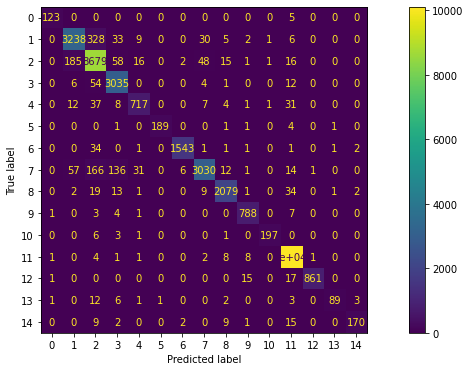

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_train, Y_train)  

In [ ]:
train_df[train_df.language=='python']

id  ... target
5      29901  ...     11
14     15780  ...     11
15     51507  ...     11
17     14135  ...     11
24     28362  ...     11
...      ...  ...    ...
45600  29860  ...     11
45601  12500  ...     11
45608  28741  ...     11
45623  77158  ...     11
45624  19972  ...     11

[12678 rows x 4 columns]

# Prediction Phase ✈

In [27]:
from tqdm.notebook import tqdm
test_probs=[]
for c in tqdm(test_df.code):
  probabilities.append(to_prob(guess.probabilities(c)))

  0%|          | 0/9277 [00:00<?, ?it/s]

In [28]:
test_df['target'] = net.predict(np.array(test_probs))

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882 in run_code  │
│                                                                                           │
│   2879 │   │   │   try:                                                                   │
│   2880 │   │   │   │   self.hooks.pre_run_code_hook()                                     │
│   2881 │   │   │   │   #rprint('Running code', repr(code_obj)) # dbg                      │
│ ❱ 2882 │   │   │   │   exec(code_obj, self.user_global_ns, self.user_ns)                  │
│   2883 │   │   │   finally:                                                               │
│   2884 │   │   │   │   # Reset our crash handler in place                                 │
│   2885 │   │   │   │   sys.excepthook = old_excepthook                                    │
│ <ipython-input-28-7fc9522272fc>:1 in <module>                                             │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'net' is not defined

In [19]:
X_test=tfidf.fit_transform(test_df.code).toarray()
pd.DataFrame(np.c_[np.array(test_doc_e),X_test]).to_csv('./test.csv')

In [20]:
test_df['target'] = predictor.predict(TabularDataset('./test.csv'))

Loaded data from: ./test.csv | Columns = 1543 / 1543 | Rows = 9277 -> 9277


In [17]:
test_df['target']=clf.predict(np.array(test_df.code))

290/290 [==============================] - 16s 56ms/step


In [ ]:
test_df.target

0       11
1        7
2        1
3       11
4        2
        ..
9272     1
9273     7
9274    11
9275     2
9276     7
Name: target, Length: 9277, dtype: int64

In [27]:
test_df["prediction"] = LE.inverse_transform(test_df.target.astype(int))

In [20]:
test_df.prediction.value_counts()

python         1755
c-plus-plus    1500
c-sharp        1425
c              1323
java           1189
javascript      663
go              458
ruby            352
julia           298
dart            137
f-sharp          56
swift            49
php              32
scala            25
R                15
Name: prediction, dtype: int64

In [21]:
test_df.prediction.value_counts()/test_df.shape[0]

python         0.189178
c-plus-plus    0.161690
c-sharp        0.153606
c              0.142611
java           0.128166
javascript     0.071467
go             0.049369
ruby           0.037943
julia          0.032122
dart           0.014768
f-sharp        0.006036
swift          0.005282
php            0.003449
scala          0.002695
R              0.001617
Name: prediction, dtype: float64

In [21]:
test_df["prediction"] = LE.inverse_transform(test_df.target)

In [51]:
test_df.target.unique()

array([ 8,  2,  1,  3,  6,  7, 11, 12,  9,  5,  4,  0, 14, 10, 13])

## Generating Prediction File

In [23]:
test_df = test_df.sample(frac=1)
test_df.head(20)

id  ...   prediction
1109  97932  ...      c-sharp
7978  36894  ...      c-sharp
31    28645  ...       python
8580  10577  ...      c-sharp
8095  89645  ...   javascript
4311  13244  ...      c-sharp
5716  25794  ...         java
5972  54410  ...            c
3895  34812  ...         dart
4827  26577  ...         java
4299  24908  ...       python
5971  77829  ...       python
8644  18837  ...  c-plus-plus
3628  10402  ...           go
2588  20670  ...           go
1151  16354  ...      c-sharp
2572  61642  ...       python
2613  16182  ...  c-plus-plus
1149  21295  ...       python
5081  33070  ...        julia

[20 rows x 4 columns]

In [ ]:
n=0
for c in test_df.code.values:
  if len(c)<10:
    print(c)
    print('----------')
    n+=1


In [ ]:
n

143

In [ ]:
for c in test_df[test_df.prediction=='python'].code.values:
  # print(len(c))
  # if len(c)>10 and len(c)<100:
  #   print(c)
  #   print('----------')
    if "\t" in c:
      print(c)

In [22]:
!rm -rf assets
!mkdir assets
test_df.to_csv(os.path.join("assets", "submission.csv"))

In [33]:
test_df['length']=test_df.code.apply(lambda x: len(x.strip()))

In [34]:
test_df[test_df.length<15]

id                         code  target   prediction  length
18    16981         })\n\n   })\n\n })\n       8   javascript      14
25    11708                          }\n       2  c-plus-plus       1
90    29463            return 0;\n\n }\n       2  c-plus-plus      13
103   90728            return 0;\n\n }\n       2  c-plus-plus      13
149   20465          }\n\n     }\n\n }\n       3      c-sharp      13
...     ...                          ...     ...          ...     ...
9219  10615            return S;\n\n }\n       2  c-plus-plus      13
9253  18556            return 0;\n\n }\n       2  c-plus-plus      13
9257  41360                    }\n\n }\n       3      c-sharp       5
9261  17016                    }\n\n }\n       3      c-sharp       5
9267  45728                          }\n       2  c-plus-plus       1

[244 rows x 5 columns]

In [ ]:
test_df.shape

(9277, 5)


# Submitting our Predictions

Note : Please save the notebook before submitting it (Ctrl + S)


In [ ]:
%aicrowd notebook submit -c programming-language-classification -a assets --no-verify

Loading config from /root/.config/aicrowd-cli/config.toml
Config loaded


In [32]:
test_df.to_csv('./out1.csv')

In [32]:
probs=predictor.predict_proba(TabularDataset('./test.csv'))

INFO     Loaded data from: ./test.csv | Columns = 845 / 845 | Rows = 9277 -> 9277

In [46]:
probs.values[18]

array([5.0928467e-04, 1.1160081e-02, 1.5288522e-02, 2.8058207e-02,
       2.4775441e-03, 4.7447262e-05, 1.4102720e-01, 1.4528935e-02,
       7.7810133e-01, 1.0754560e-04, 2.5625876e-04, 2.6031123e-03,
       1.4028563e-04, 1.8877623e-03, 3.8064935e-03], dtype=float32)

In [ ]:
classifier.predict_proba(test_df['code'][test_df.id==10489])

array([[1.91164568e-05, 1.92815804e-04, 3.32183194e-02, 6.36783603e-04,
        6.61995848e-04, 2.23867596e-05, 5.89270683e-02, 6.61368886e-02,
        1.51140791e-02, 1.83293243e-02, 9.15378369e-05, 8.06442630e-01,
        1.46123115e-04, 1.25006287e-05, 4.84300540e-05]])

In [ ]:
test_df.loc[test_df.id==10489,'code']

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882 in run_code  │
│                                                                                           │
│   2879 │   │   │   try:                                                                   │
│   2880 │   │   │   │   self.hooks.pre_run_code_hook()                                     │
│   2881 │   │   │   │   #rprint('Running code', repr(code_obj)) # dbg                      │
│ ❱ 2882 │   │   │   │   exec(code_obj, self.user_global_ns, self.user_ns)                  │
│   2883 │   │   │   finally:                                                               │
│   2884 │   │   │   │   # Reset our crash handler in place                                 │
│   2885 │   │   │   │   sys.excepthook = old_excepthook                                    │
│ <ipython-input-61-dabada34438b>:1 in <module>                                             │
│                                                                                           │
│ /usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:35 in __getitem__           │
│                                                                                           │
│    32 │   This class provides common dispatching and validation logic for indexing.       │
│    33 │   """                                                                             │
│    34 │   def __getitem__(self, key):                                                     │
│ ❱  35 │   │   row, col = self._validate_indices(key)                                      │
│    36 │   │   # Dispatch to specialized methods.                                          │
│    37 │   │   if isinstance(row, INT_TYPES):                                              │
│    38 │   │   │   if isinstance(col, INT_TYPES):                                          │
│                                                                                           │
│ /usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:139 in _validate_indices    │
│                                                                                           │
│   136 │   │   │   if row < 0:                                                             │
│   137 │   │   │   │   row += M                                                            │
│   138 │   │   elif not isinstance(row, slice):                                            │
│ ❱ 139 │   │   │   row = self._asindices(row, M)                                           │
│   140 │   │                                                                               │
│   141 │   │   if isintlike(col):                                                          │
│   142 │   │   │   col = int(col)                                                          │
│                                                                                           │
│ /usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:171 in _asindices           │
│                                                                                           │
│   168 │   │   # Check bounds                                                              │
│   169 │   │   max_indx = x.max()                                                          │
│   170 │   │   if max_indx >= length:                                                      │
│ ❱ 171 │   │   │   raise IndexError('index (%d) out of range' % max_indx)                  │
│   172 │   │                                                                               │
│   173 │   │   min_indx = x.min()                                                          │
│   174 │   │   if min_indx < 0:                                                            │
╰───────────────────────────────────────────────────

In [ ]:
f=np.argsort(classifier['tfidf'].transform(test_df['code'][test_df.id==10489]).toarray())[::-1]
mylist=sorted(classifier['tfidf'].vocabulary_, key=classifier['tfidf'].vocabulary_.get)
print(np.array(mylist)[f[:50]])
for feat,imp in zip(np.array(mylist)[f[:50]],classifier['tfidf'].transform(test_df['code'][test_df.id==10489]).toarray()[0][f[:50]]):
  print(feat,imp)

[['\t' 'port' 'pop' ... 'generate' 'io' 'password']]
['\t' 'port' 'pop' ... 'generate' 'io' 'password'] [0.         0.         0.         ... 0.45898756 0.48850382 0.58760062]


In [ ]:
clf_pred=classifier['tfidf'].transform(test_df['code'][test_df.id==10489]).toarray()[0]
mylist=sorted(classifier['tfidf'].vocabulary_, key=classifier['tfidf'].vocabulary_.get)
f=np.argsort(clf_pred)[::-1]
myslice=f[:50]
clf_pred[myslice]

array([0.58760062, 0.48850382, 0.45898756, 0.34914999, 0.28898828,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
np.array(mylist)[myslice]

array(['password', 'io', 'generate', 'math', 'returns', '~/', 'evaluate',
       'equation', 'err', 'error', 'errorf', 'errors', 'euler', 'event',
       'even', 'equal', 'every', 'exact', 'exactly', 'example',
       'examples', 'exception', 'execute', 'exist', 'equals', 'epsilon',
       'exit', 'encoding', 'element', 'elementindex', 'elements', 'elif',
       'else', 'empty', 'en', 'encode', 'encoded', 'encrypt', 'enumerate',
       'encrypted', 'encryption', 'end', 'endif', 'endindex', 'endl',
       'enqueue', 'enter', 'entry', 'exists', 'expected'], dtype='<U27')

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mf=mutual_info_classif(test_vect.transform(train_df['code']),train_df.target)

In [ ]:
test_vect.vocabulary_[np.argsort(mf)[::-1]]

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882 in run_code  │
│                                                                                           │
│   2879 │   │   │   try:                                                                   │
│   2880 │   │   │   │   self.hooks.pre_run_code_hook()                                     │
│   2881 │   │   │   │   #rprint('Running code', repr(code_obj)) # dbg                      │
│ ❱ 2882 │   │   │   │   exec(code_obj, self.user_global_ns, self.user_ns)                  │
│   2883 │   │   │   finally:                                                               │
│   2884 │   │   │   │   # Reset our crash handler in place                                 │
│   2885 │   │   │   │   sys.excepthook = old_excepthook                                    │
│ <ipython-input-84-65f744701d80>:1 in <module>                                             │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
predictor.leaderboard()

                  model  score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2     0.8352      22.604783   897.400392                0.004708           1.339523            2       True         13
1            LightGBMXT     0.8244      13.267164   187.755843               13.267164         187.755843            1       True          4
2         LightGBMLarge     0.8156       4.561145   131.926170                4.561145         131.926170            1       True         12
3              LightGBM     0.8116       2.556177    78.689046                2.556177          78.689046            1       True          5
4       NeuralNetFastAI     0.8060       3.448163   286.104741                3.448163         286.104741            1       True          3
5               XGBoost     0.7852       0.593962    78.097259                0.593962          78.097259            1       True         11
6        Extr

model  score_val  ...  can_infer  fit_order
0   WeightedEnsemble_L2     0.8352  ...       True         13
1            LightGBMXT     0.8244  ...       True          4
2         LightGBMLarge     0.8156  ...       True         12
3              LightGBM     0.8116  ...       True          5
4       NeuralNetFastAI     0.8060  ...       True          3
5               XGBoost     0.7852  ...       True         11
6        ExtraTreesGini     0.7776  ...       True          9
7      RandomForestGini     0.7672  ...       True          6
8        ExtraTreesEntr     0.7664  ...       True         10
9      RandomForestEntr     0.7492  ...       True          7
10             CatBoost     0.7360  ...       True          8
11       KNeighborsUnif     0.2028  ...       True          1
12       KNeighborsDist     0.1992  ...       True          2

[13 rows x 9 columns]